# Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

# Read in Data

In [3]:
df = pd.read_excel('city_health.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


###### Source of Data: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html
- The data (X1, X2, X3, X4, X5) are by city.
- X1 = death rate per 1000 residents
- X2 = doctor availability per 100,000 residents
- X3 = hospital availability per 100,000 residents
- X4 = annual per capita income in thousands of dollars
- X5 = population density people per square mile

In [4]:
df.head()

,X1,X2,X3,X4,X5
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


# Wrangle Data

In [5]:
# Label columns with appropriate variable names
df.columns = ['death_rate','doct_avail', 'hosp_avail', 'annual_per_capita_inc', 'pop_dens']

In [11]:
df.head()

,death_rate,doct_avail,hosp_avail,annual_per_capita_inc,pop_dens
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


In [9]:
# No missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
death_rate               53 non-null float64
doct_avail               53 non-null int64
hosp_avail               53 non-null int64
annual_per_capita_inc    53 non-null float64
pop_dens                 53 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


# Checking Assumptions for MLR

In [12]:
# Response Variable and Predictor Variables
df2 = df.copy()
y = df2[['death_rate']]
X = df2.drop('death_rate', axis=1)

In [10]:
# MLR
regr = linear_model.LinearRegression()

In [15]:
# Split data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [16]:
# Fit MLR on training data
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Equal Variance of Residuals

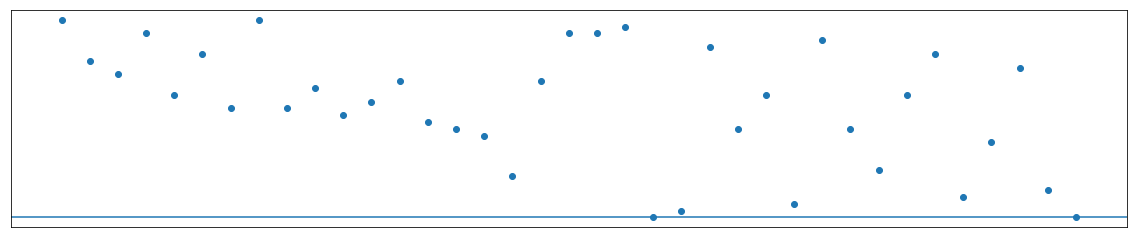

In [44]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.axhline(y=0)

## No Labels on x,y axis for clearer plot
# plt.axis('off')
plt.xticks([], [])
plt.yticks([], [])

plt.scatter(y_train - regr.predict(X_train), y_train)

Residuals are randomly scattered

###### Normality of Residual Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A252EAA90>]], dtype=object)

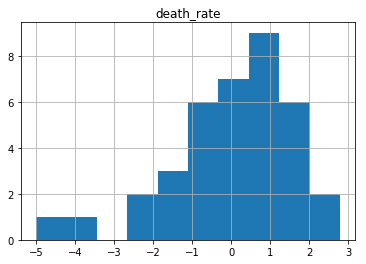

In [45]:
# Histogram
(y_train - regr.predict(X_train)).hist()

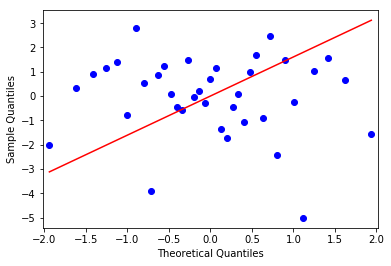

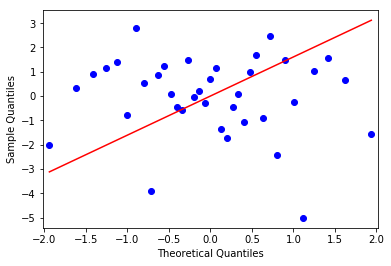

In [60]:
# QQ Plot
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

qqplot(y_train - regr.predict(X_train), line='s')

###### Shapiro-Wilk Test (Usually better for small data set, 1000 observations or smaller)

In [65]:
from scipy.stats import shapiro

stat, p = shapiro(y_train - regr.predict(X_train))
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.936, p=0.035


Reject the null hypothesis that distribution of residuals is normal

###### D’Agostino’s K^2 Test

In [66]:
from scipy.stats import normaltest

stat, p = normaltest(y_train - regr.predict(X_train))
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=10.025, p=0.007


Reject the null hypothesis that distribution of residuals is normal

Assumption about normality of Residuals seems to have been violated but we proceed with MLR just for tutorial purposes

# MLR with SKlearn

In [76]:
# Beta0 , Coefficients(Betas), Mean Squared Error, Variance Score
print(regr.intercept_)
print('Coefficients: \n', regr.coef_)
print("Mean Squared Error: %.2f" % np.mean((regr.predict(X_test) - y_test)**2))
print('Variance Score: %.2f' % regr.score(X_test, y_test))

[ 10.22784164]
Coefficients: 
 [[ 0.00941757  0.00133217 -0.14969665 -0.01389331]]
Mean Squared Error: 2.24
Variance Score: -0.66


In [82]:
# Variables and Coefficients
names=X.columns
pd.DataFrame(list(zip(names,regr.coef_[0].tolist())),columns=['Variable Names','coefficients'])

,Variable Names,coefficients
0,doct_avail,0.009418
1,hosp_avail,0.001332
2,annual_per_capita_inc,-0.149697
3,pop_dens,-0.013893


# MLR with Statsmodel's OLS Estimator

In [89]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [90]:
# OLS Estimator
ols_model=sm.OLS(y_train,X_train)

In [92]:
# Summary Statistics of OLS estimator Model
print(ols_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     172.4
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           1.28e-21
Time:                        17:53:57   Log-Likelihood:                -78.300
No. Observations:                  37   AIC:                             164.6
Df Residuals:                      33   BIC:                             171.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
doct_avail                0.00

# Dealing with Multicollinearity

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

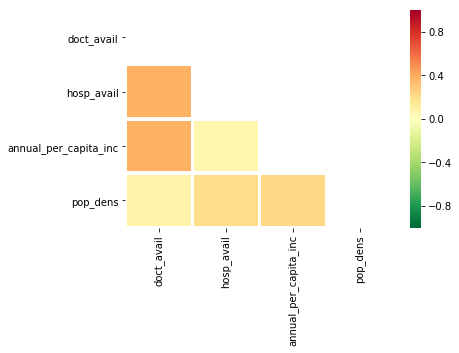

In [98]:
# Correlation Matrix Heatmap
corr_df = X_train.corr(method='pearson')

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,cmap='RdYlGn_r', vmax=1.0, vmin=-1.0,mask=mask,linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)